# Agrupando colores

Vamos a crear imagenes con una cantidad fija de colores

#### 1. Importa las librerias
Vamos a necesitar `KMeans` de `sklearn.cluster`, `imread` de `matplotlib.image`, `matplotlib.pyplot` y `numpy`


In [20]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#### 2. Lee una imagen
Utiliza alguna foto que tengas en tu ordenador y leela con la función `imread`

Consejo: utiliza una imagen pequeña si no quieres tardar una eternidad en que se ejecute el kmeans

In [3]:
image = plt.imread('data/foto_clase.png')
image

array([[[0.1254902 , 0.12941177, 0.14117648, 1.        ],
        [0.5686275 , 0.68235296, 0.8666667 , 1.        ],
        [0.4       , 0.6156863 , 0.9647059 , 1.        ],
        ...,
        [0.1254902 , 0.12941177, 0.14117648, 1.        ],
        [0.1254902 , 0.12941177, 0.14117648, 1.        ],
        [0.1254902 , 0.12941177, 0.14117648, 1.        ]],

       [[0.5568628 , 0.63529414, 0.7607843 , 1.        ],
        [0.4       , 0.6156863 , 0.9647059 , 1.        ],
        [0.4       , 0.6156863 , 0.9647059 , 1.        ],
        ...,
        [0.1254902 , 0.12941177, 0.14117648, 1.        ],
        [0.1254902 , 0.12941177, 0.14117648, 1.        ],
        [0.1254902 , 0.12941177, 0.14117648, 1.        ]],

       [[0.4       , 0.6156863 , 0.9647059 , 1.        ],
        [0.4       , 0.6156863 , 0.9647059 , 1.        ],
        [0.4       , 0.6156863 , 0.9647059 , 1.        ],
        ...,
        [0.1254902 , 0.12941177, 0.14117648, 1.        ],
        [0.1254902 , 0.129411

In [4]:
image.shape

(797, 1767, 4)

In [6]:
image = image[:,:,:3].copy()
image.shape

(797, 1767, 3)

In [8]:
image.size/3

1408299.0

Muestra la imagen para ver que se ha cargado bien

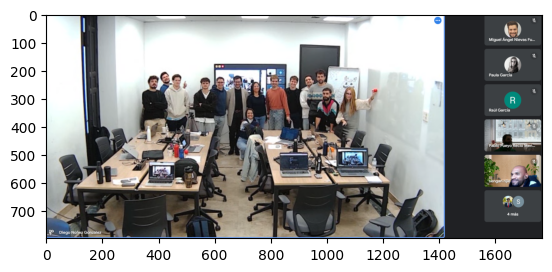

In [9]:
plt.imshow(image)

#### 3. Modifica la estructura de la imagen
Queremos que cada pixel sea una observación por lo que tenemos que transformar nuestra imagen de un vector de forma (alto, ancho, color) a (alto x ancho, color). Color será siempre 3, que son los tres canales de los colores.

Ej: (300, 400, 3) -> (120000, 3)

In [10]:
X = image.reshape(-1,3)
X.shape

(1408299, 3)

#### 4. K-means
Haz un k-means con la imagen de entrada (Con la nueva forma que le hemos dado). K será el número de colores que quieras que tenga tu imagen de salida

In [49]:
k = 20

kmeans = KMeans(n_clusters=k, n_init=10, random_state=10).fit(X)

#### 5. Sustituye cada valor por su centroide

Una vez hemos entrenado el kmeans entre otros parametros de salida tiene `cluster_centers_` y `labels_`. Utilizlos para crear una nueva imagen (recuerda que las imagenes simplemente son vectores numéricos) en la que cada pixel se sustituye por su centroide correspondiente.

In [50]:
kmeans.labels_

array([19, 13, 13, ..., 19, 19, 19])

In [51]:
df_cluster = pd.DataFrame(X, columns=['R', 'G', 'B'])
df_cluster['cluster'] = kmeans.labels_
df_cluster

,R,G,B,cluster
0,0.125490,0.129412,0.141176,19
1,0.568627,0.682353,0.866667,13
2,0.400000,0.615686,0.964706,13
3,0.400000,0.615686,0.964706,13
4,0.400000,0.615686,0.964706,13
...,...,...,...,...
1408294,0.125490,0.129412,0.141176,19
1408295,0.125490,0.129412,0.141176,19
1408296,0.125490,0.129412,0.141176,19
1408297,0.125490,0.129412,0.141176,19


In [52]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df_cluster.sample(frac=0.01), x='R', y='G', z='B',
              color='cluster')
fig.show()

In [53]:
kmeans.cluster_centers_

array([[0.18850705, 0.18635339, 0.19277146],
       [0.82602787, 0.85871726, 0.85720396],
       [0.61886716, 0.5441242 , 0.46617323],
       [0.99190855, 0.9983985 , 0.9979045 ],
       [0.6273581 , 0.6362991 , 0.6331295 ],
       [0.24208495, 0.25067696, 0.2611403 ],
       [0.38645196, 0.3221025 , 0.26205865],
       [0.7066809 , 0.7180401 , 0.71241945],
       [0.51445276, 0.5274077 , 0.5387772 ],
       [0.86891854, 0.77250385, 0.6858185 ],
       [0.07054114, 0.06648606, 0.06614184],
       [0.46665806, 0.4376848 , 0.40914088],
       [0.3247346 , 0.3431137 , 0.37477338],
       [0.39760587, 0.6160693 , 0.954947  ],
       [0.73155934, 0.6472196 , 0.5633467 ],
       [0.13197273, 0.40517595, 0.5216946 ],
       [0.8976676 , 0.93834096, 0.9352367 ],
       [0.7666701 , 0.789191  , 0.7859864 ],
       [0.6162001 , 0.32283658, 0.26721126],
       [0.12563369, 0.12780568, 0.13563678]], dtype=float32)

In [54]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]

#### 6. Modifica la estructura de la imagen
Para trabajar con el k-means requeriamos que la imagen original fuese un solo vector, ahora como queremos volver a tener la imagen para volver mostrarla debemos hacer el proceso inverso a el paso 3. (Si has guardado la forma de la imagen original te será más facil hacer este paso)

In [55]:
segmented_img = segmented_img.reshape(image.shape)

#### 7. Imprime y guarda en tu ordenador la imagen resultante

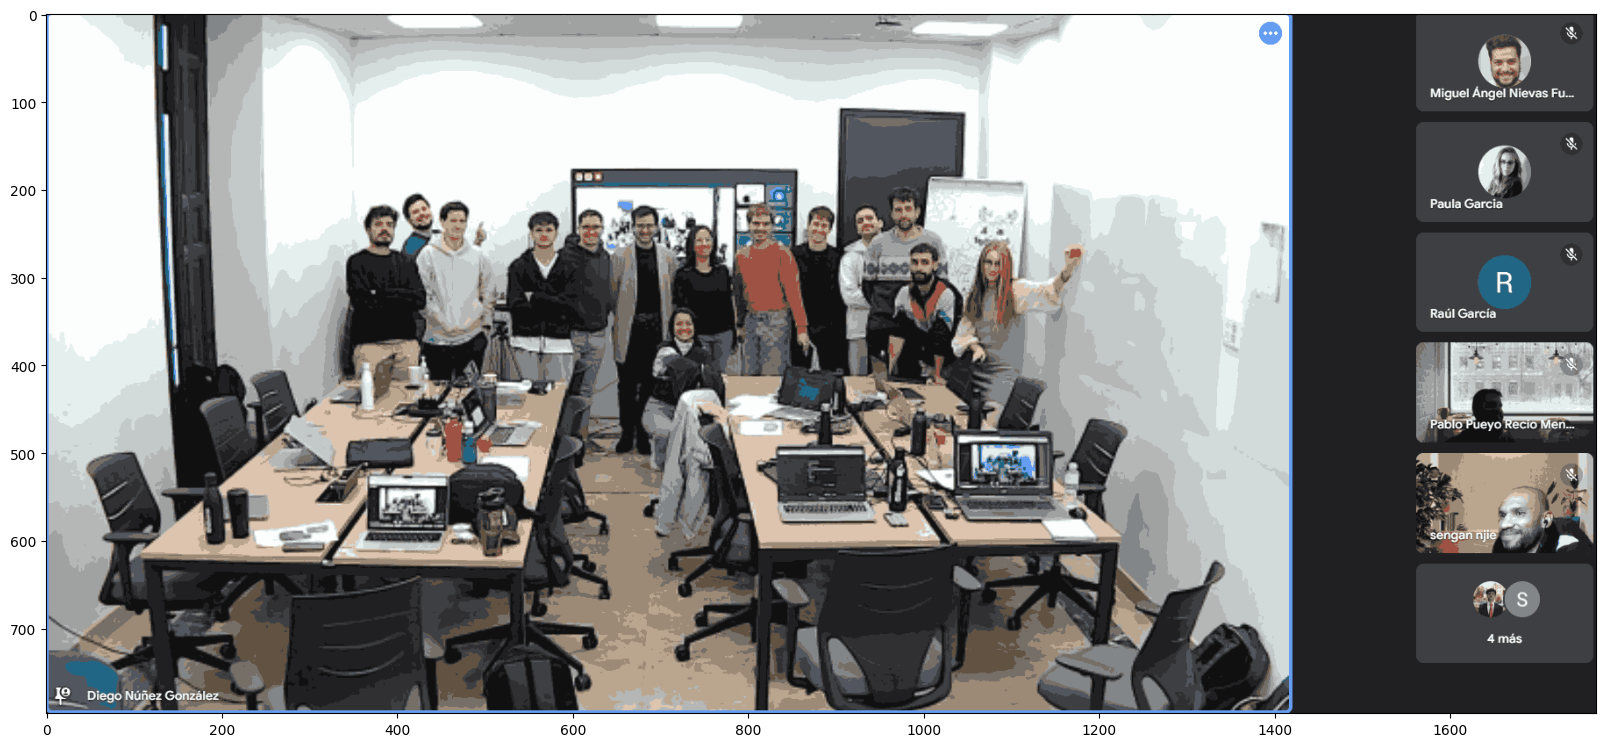

In [56]:
plt.figure(figsize=(20,15))
plt.imshow(segmented_img)

#### 8. Crea una función
Crea una función que tenga como argumentos de entrada una imagen, el numero de colores que quieres que tenga, y si se quiere guardar o mostrar por pantalla

In [61]:
def cluster_colors(image, n_colores):
    image = plt.imread(image)
    image = image[:,:,:3].copy()
    X = image.reshape(-1,3)
    kmeans = KMeans(n_clusters=n_colores, n_init=10).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    plt.imshow(segmented_img.reshape(image.shape))

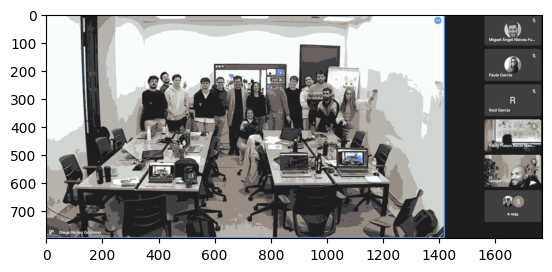

In [62]:
cluster_colors("data/foto_clase.png", 8)

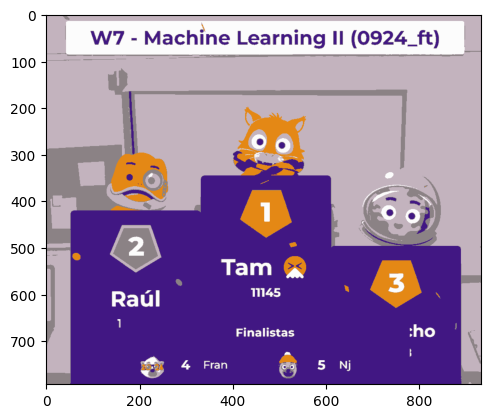

In [65]:
cluster_colors("data/image.png", 5)